# Assignment 4

### MACS 30150, Dr. Evans
### Dongcheng Yang  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import chi2
from scipy.stats import lognorm
import pandas as pd

problem 1(a)

In [2]:
pts = np.loadtxt('incomes.txt')

C:\Users\pcc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 150000)

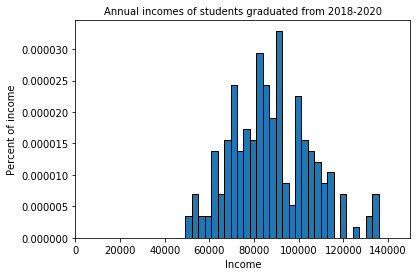

In [3]:
num_bins = 30
plt.hist(pts, num_bins,edgecolor='k',normed=True)
plt.title('Annual incomes of students graduated from 2018-2020', fontsize=10)
plt.xlabel(r'Income')
plt.ylabel('Percent of income')
plt.xlim([0, 150000])  # This gives the xmin and xmax to be plotted"

(b)

Log-likelihood:  -2385.856997808558


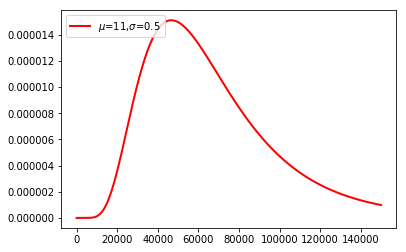

In [15]:
def log_normal_pdf(xvals, mu, sigma):
    return 1/(xvals*sigma * np.sqrt(2 * np.pi))*np.e \
            **(-(np.log(xvals) - mu)**2 / (2 * sigma**2))

# Plot smooth line with distribution 1
dist_pts = np.linspace(1e-9, 150000, 200000)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_1, sig_1 ),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

def log_lik_log_normal(xvals, mu, sigma):
    pdf_vals = log_normal_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

print('Log-likelihood: ', log_lik_log_normal(pts, mu_1, sig_1))


(c)

In [16]:
def crit(params, *args):
    mu, sigma = params
    incomes = args
    pdf_vals = lognorm.pdf(incomes, s=abs(sigma), scale=np.exp(mu))
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
mle_args = pts
results = opt.minimize(crit, params_init, args=mle_args)
mu, sigma = results.x
Hess = results.hess_inv
fval = -results.fun
print('The optimized result is mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))
print('The value of the likelihood function is ', fval)
print('The inverse Hessian matrix is\n ', Hess)

The optimized result is mu = 11.36, sigma = 0.21
The value of the likelihood function is  -2241.7193013573587
The inverse Hessian matrix is
  [[ 2.20429404e-04 -9.56905596e-07]
 [-9.56905596e-07  1.08962777e-04]]


C:\Users\pcc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


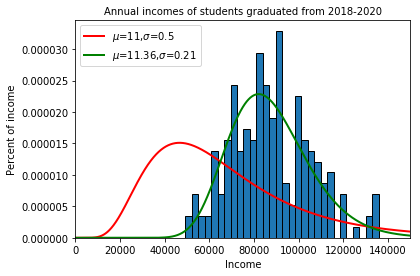

In [7]:
num_bins = 30
plt.hist(pts, num_bins,edgecolor='k',normed=True)
plt.title('Annual incomes of students graduated from 2018-2020', fontsize=10)
plt.xlabel(r'Income')
plt.ylabel('Percent of income')
plt.xlim([1e-9, 150000])  # This gives the xmin and xmax to be plotted"

# Plot smooth line with distribution 1
dist_pts = np.linspace(1e-9, 150000, 200000)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_1, sig_1 ),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper left')

# Plot smooth line with MLE distribution
dist_pts = np.linspace(1e-9, 150000, 200000)
mu_2 = mu
sig_2 = sigma
plt.plot(dist_pts, log_normal_pdf(dist_pts, mu_2, sig_2 ),
         linewidth=2, color='g', label='$\mu$=11.36,$\sigma$=0.21')
plt.legend(loc='upper left')


(d)

In [8]:
mu_new, sig_new = np.array([11, 0.5])
log_lik_h0 = log_lik_log_normal(pts, mu_new, sig_new)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_log_normal(pts, mu, sigma)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2385.856997808558
MLE log likelihood -2241.7193013573587
likelihood ratio value 288.2753929023984
chi squared of H0 with 2 degrees of freedom p-value =  0.0


(e)

In [9]:
prob1 = 1 - lognorm.cdf(100000, s=sigma, scale=np.exp(mu))
prob2 = lognorm.cdf(75000, s=sigma, scale=np.exp(mu))
print('Probability of earning more than $100,000 is {:.3f}'.format(prob1))
print('Probability of earning less than $75,000 is {:.3f}'.format(prob2))

Probability of earning more than $100,000 is 0.230
Probability of earning less than $75,000 is 0.260


problem 2 (a)

In [10]:
df=pd.read_csv("sick.txt").astype('float64')

In [11]:
def norm_pdf(xvals, sig):
    pdf_vals = (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(xvals)**2 / (2*sig**2))                  
    return pdf_vals

def log_lik_norm(y, x1, x2, x3, beta0, beta1, beta2, beta3, sig):
    epsilon = y-beta0-beta1*x1-beta2*x2-beta3*x3
    pdf_vals = norm_pdf(epsilon, sig)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit2(params,*args):
    beta0, beta1, beta2, beta3, sig = params
    y, x1, x2, x3 = args
    log_lik_val = log_lik_norm(y, x1, x2, x3, beta0, beta1, \
                               beta2, beta3, sig)
    neg_log_lik_val = -log_lik_val 
    return neg_log_lik_val

In [12]:
b0_init, b1_init, b2_init, b3_init, sig_init = (0.2,0,0,0,1)
y, x1, x2, x3=df['sick'],df['age'], df['children'], df['avgtemp_winter']
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
results = opt.minimize(crit2, params_init,(y, x1, x2, x3))
b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE = results.x
print('beta 0=', b0_MLE)
print('beta 1=', b1_MLE)
print('beta 2=', b2_MLE)
print('beta 3=', b3_MLE)
print('sigma=', sig_MLE)
print("value of the log likelihood function:",-results.fun)

C:\Users\pcc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\pcc\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\pcc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\pcc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\pcc\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


beta 0= 0.2516462863009143
beta 1= 0.012933350241651839
beta 2= 0.4005020598812094
beta 3= -0.009991671522641493
sigma= 0.0030177004489735067
value of the log likelihood function: 876.8650468414168


In [13]:
vcv_mle = results.hess_inv
print('estimated variance covariance matrix of the estimates:\n ', vcv_mle)

estimated variance covariance matrix of the estimates:
  [[ 1.08579401e-06  4.52195731e-09 -1.47000525e-07 -2.20502350e-08
   5.57249528e-09]
 [ 4.52195731e-09  4.20615273e-09 -3.71445246e-08 -2.57941093e-09
  -1.28317610e-10]
 [-1.47000525e-07 -3.71445246e-08  3.77442634e-07  2.33178375e-08
   6.82198342e-10]
 [-2.20502350e-08 -2.57941093e-09  2.33178375e-08  1.99610060e-09
  -2.42837085e-11]
 [ 5.57249528e-09 -1.28317610e-10  6.82198342e-10 -2.42837085e-11
   2.31215973e-08]]


(b)

In [14]:
b0_new, b1_new, b2_new, b3_new, sig_new = np.array([1,0,0,0,0.1])
log_lik_h0 = log_lik_norm(y, x1, x2, x3, b0_new, \
                          b1_new, b2_new, b3_new, sig_new)
print('hypothesis value log likelihood', log_lik_h0)
print('MLE log likelihood', -results.fun)
LR_val = 2 * ((-results.fun)-log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2253.700688042125
MLE log likelihood 876.8650468414168
likelihood ratio value 6261.131469767083
chi squared of H0 with 2 degrees of freedom p-value =  0.0


The results shows that we could reject the null hypothesis that age, number of children and average winter temperature have no effect on the number of sick days.